In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE 

**Read Data**

In [ ]:
bike_df = pd.read_csv("day.csv")
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [ ]:
bike_df.shape

(730, 16)

**Check the columns and its data types**

In [ ]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


**Check the statistical description of the data**

In [ ]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


**Drop unwanted columns**

*   instant - instant is just the index of the data, so we didn't need that for model building
*   dteday - from dteday there are two columns derived yr and mnth
*   casual, registered - for model building we didn't need casual and registered(casual + registered = cnt)






In [ ]:
bike_df = bike_df.drop(['instant', 'dteday', 'casual', 'registered'], axis =1)

In [ ]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [ ]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


**Data Visualization**

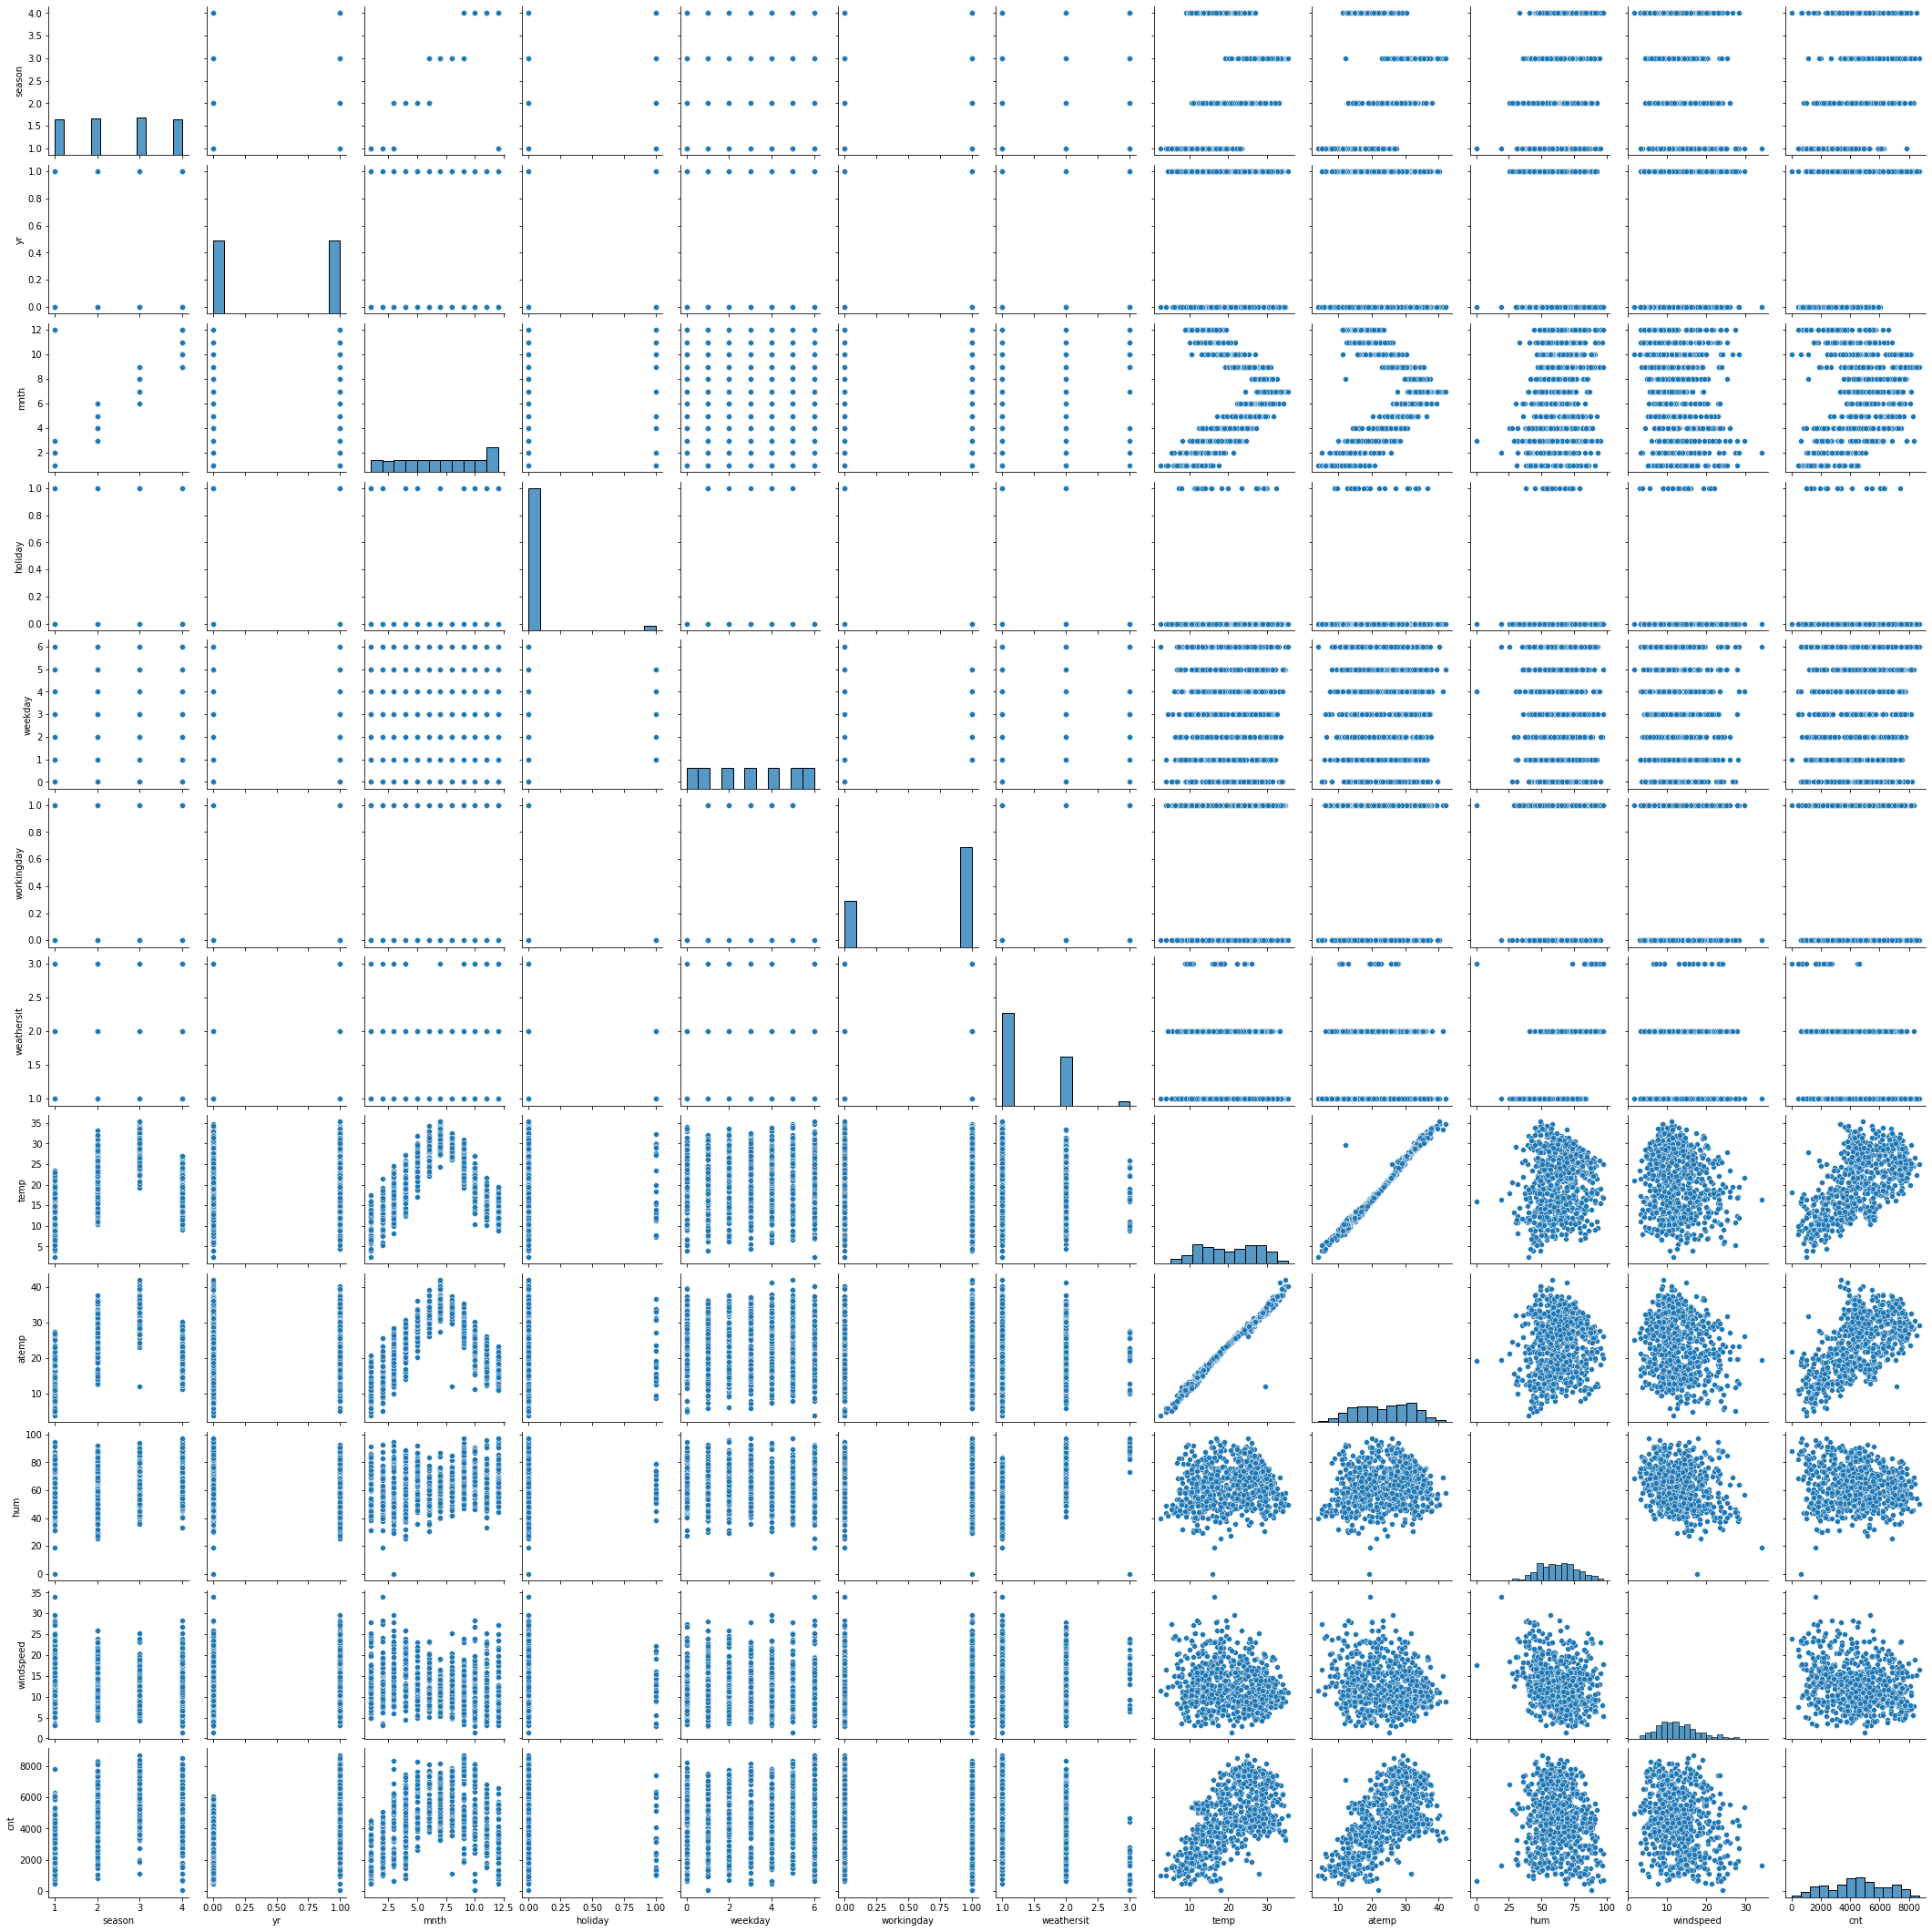

In [ ]:
sns.pairplot(bike_df)
plt.show()

**Set values to catogorial columns**

In [ ]:
bike_df[['season']]= bike_df[['season']].apply(lambda x: x.map({1:'spring',2:'summer',3:'fall',4:'winter'}))


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


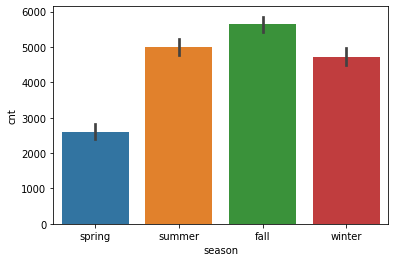

In [ ]:
sns.barplot('season','cnt',data=bike_df)

In [ ]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


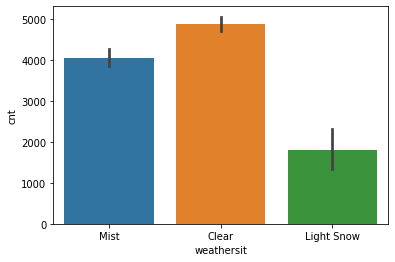

In [ ]:
bike_df[['weathersit']] = bike_df[['weathersit']].apply(lambda x : x.map({1:'Clear',2:'Mist',3:'Light Snow',4:'Heavy Rain'}))
sns.barplot('weathersit','cnt',data=bike_df)

In [ ]:
cor = bike_df.corr()
cor

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt
yr,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,-0.000168,-0.007539,-0.052290,0.014283,0.067534
workingday,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.053470,0.052940,0.023202,-0.018666,0.062542
temp,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-1.162435e-02,-2.080131e-01,0.006257,0.014283,-0.018666,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,5.697285e-01,2.781909e-01,-0.068764,0.067534,0.062542,0.627044,0.630685,-0.098543,-0.235132,1.000000


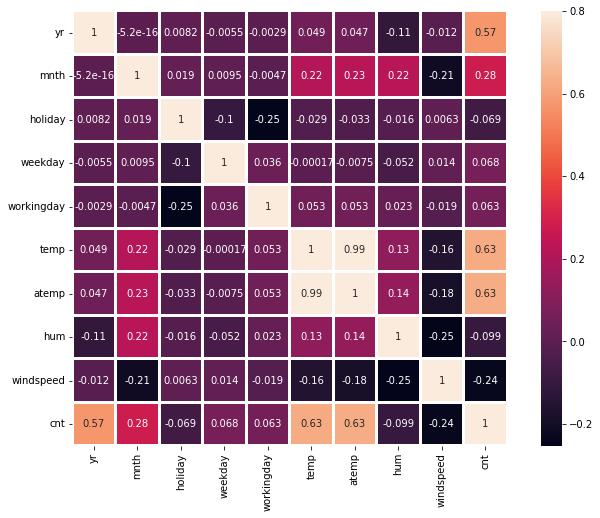

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(cor, vmax=0.8, square=True, annot=True,linewidths=2);

atemp and temp are highly corelated so we can drop the column atemp

In [ ]:
bike_df = bike_df.drop('atemp',axis=1)
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,1,0,6,0,Mist,14.110847,80.5833,10.749882,985
1,spring,0,1,0,0,0,Mist,14.902598,69.6087,16.652113,801
2,spring,0,1,0,1,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,1,0,2,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,1,0,3,1,Clear,9.305237,43.6957,12.522300,1600


Add dummy variable in season column


In [ ]:
season_val = pd.get_dummies(bike_df['season'], drop_first = True)

Add the result to the origial data frame

In [ ]:
bike_df = pd.concat([bike_df, season_val], axis = 1)
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter
0,spring,0,1,0,6,0,Mist,14.110847,80.5833,10.749882,985,1,0,0
1,spring,0,1,0,0,0,Mist,14.902598,69.6087,16.652113,801,1,0,0
2,spring,0,1,0,1,1,Clear,8.050924,43.7273,16.636703,1349,1,0,0
3,spring,0,1,0,2,1,Clear,8.200000,59.0435,10.739832,1562,1,0,0
4,spring,0,1,0,3,1,Clear,9.305237,43.6957,12.522300,1600,1,0,0


Drop season since we have created dummy columns

In [ ]:
bike_df.drop(['season'], axis = 1, inplace = True)

In [ ]:
bike_df.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter
0,0,1,0,6,0,Mist,14.110847,80.5833,10.749882,985,1,0,0
1,0,1,0,0,0,Mist,14.902598,69.6087,16.652113,801,1,0,0
2,0,1,0,1,1,Clear,8.050924,43.7273,16.636703,1349,1,0,0
3,0,1,0,2,1,Clear,8.200000,59.0435,10.739832,1562,1,0,0
4,0,1,0,3,1,Clear,9.305237,43.6957,12.522300,1600,1,0,0


In [ ]:
weather_val = pd.get_dummies(bike_df['weathersit'], drop_first = True)
bike_df = pd.concat([bike_df, weather_val], axis = 1)
bike_df.drop(['weathersit'], axis = 1, inplace = True)
bike_df.head()

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Light Snow,Mist
0,0,1,0,6,0,14.110847,80.5833,10.749882,985,1,0,0,0,1
1,0,1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,1
2,0,1,0,1,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0
3,0,1,0,2,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0
4,0,1,0,3,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0


 **Splitting the data into training and testing sets**

In [ ]:
df_train, df_test = train_test_split(bike_df, train_size = 0.7, random_state=100)

In [ ]:
print(df_train.shape)
print(df_test.shape)

(510, 14)
(220, 14)


**Rescaling the numarical features**

In [ ]:
scaler = MinMaxScaler()

In [ ]:
bike_df.columns

Index(['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp', 'hum',
       'windspeed', 'cnt', 'spring', 'summer', 'winter', 'Light Snow', 'Mist'],
      dtype='object')

In [ ]:
numerical_features = ['temp', 'hum', 'windspeed', 'cnt']

In [ ]:
df_train[numerical_features] = scaler.fit_transform(df_train[numerical_features])

In [ ]:
df_test[numerical_features]= scaler.transform(df_test[numerical_features])

In [ ]:
df_train.head()

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Light Snow,Mist
576,1,7,0,2,1,0.815169,0.725633,0.264686,0.827658,0,0,0,0,0
426,1,3,0,6,0,0.442393,0.640189,0.255342,0.465255,1,0,0,0,1
728,1,12,0,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,0,0
482,1,4,0,6,0,0.395666,0.504508,0.188475,0.482973,0,1,0,0,1
111,0,4,0,5,1,0.345824,0.751824,0.380981,0.191095,0,1,0,0,1


In [ ]:
df_train.describe()

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Light Snow,Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,6.541176,0.025490,2.990196,0.676471,0.537440,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,0.029412,0.345098
std,0.500429,3.465416,0.157763,2.017093,0.468282,0.225858,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,0.169124,0.475867
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.000000,0.000000,1.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,7.000000,0.000000,3.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,10.000000,0.000000,5.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,12.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


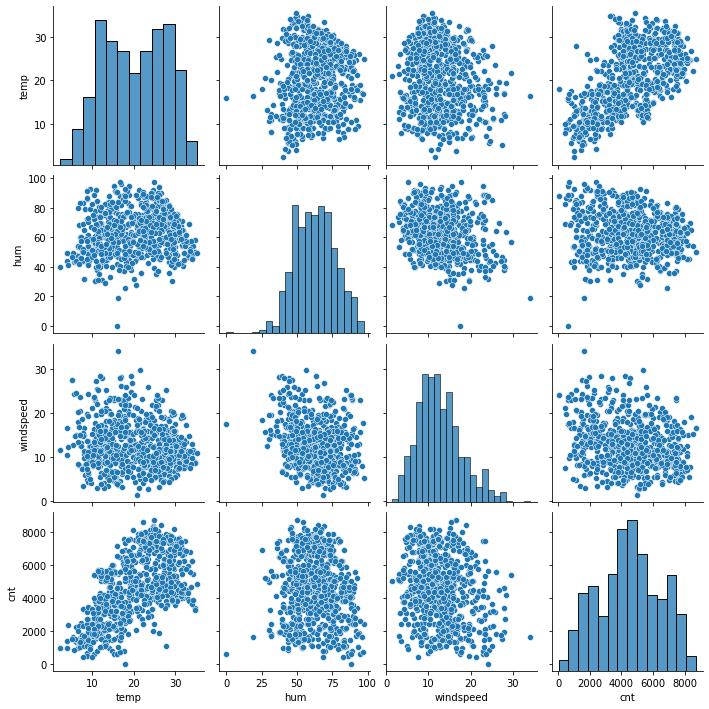

In [ ]:
sns.pairplot(bike_df[numerical_features])
plt.show()

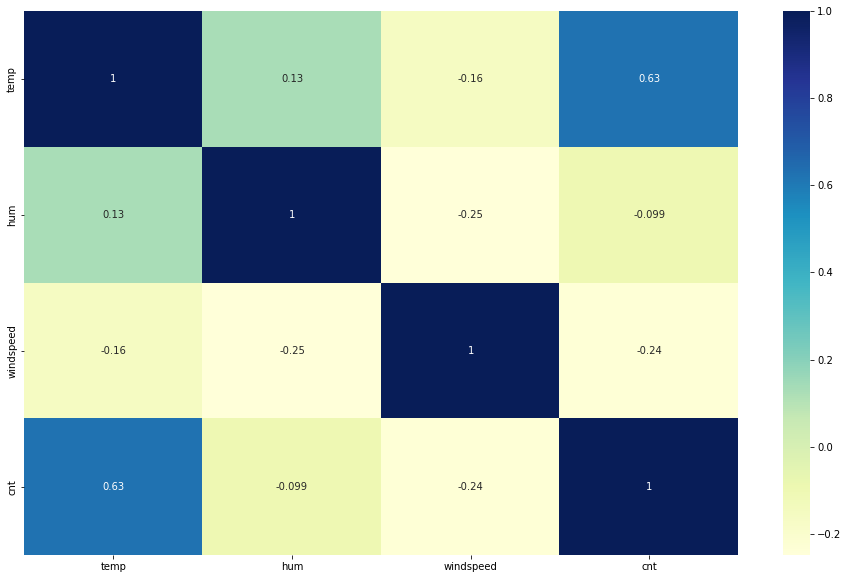

In [ ]:
plt.figure(figsize = (16, 10))
sns.heatmap(bike_df[numerical_features].corr(), annot = True, cmap="YlGnBu")
plt.show()

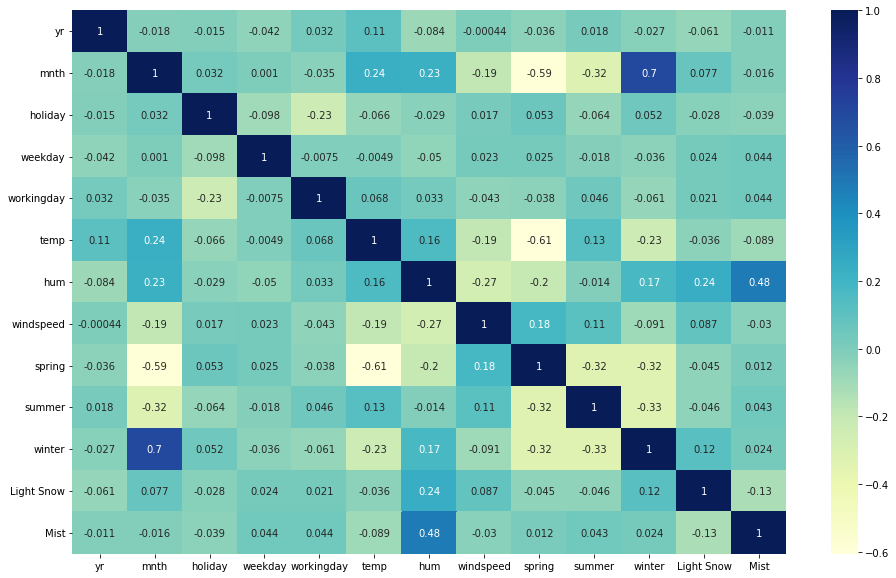

In [ ]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

From the heat map it's clear that temp and cnt are highly corelated

Dividiing into X_train, y_train, X_test, y_test

In [ ]:
y_train = df_train.pop('cnt')
X_train = df_train

In [ ]:
y_test = df_test.pop('cnt')
X_test = df_test

**Building our model using statsmodel**

Add contant to the dataframe

In [ ]:
X_train_sm = sm.add_constant(X_train)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Fit the model

In [ ]:
lr = sm.OLS(y_train,X_train_sm).fit()

In [ ]:
lr.params

const         0.238416
yr            0.232134
mnth          0.001361
holiday      -0.064324
weekday       0.008004
workingday    0.018702
temp          0.492458
hum          -0.127347
windspeed    -0.180652
spring       -0.068397
summer        0.048490
winter        0.084839
Light Snow   -0.247026
Mist         -0.056679
dtype: float64

In [ ]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     190.7
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          2.35e-183
Time:                        11:47:22   Log-Likelihood:                 495.69
No. Observations:                 510   AIC:                            -963.4
Df Residuals:                     496   BIC:                            -904.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2384      0.039      6.048      0.000       0.161       0.316
yr             0.2321      0.008     27.721      0.000       0.216       0.249
mnth           0.0014      0.002      0.581      0.561      -0.003       0.006
holiday       -0.0643      0.027     -2.375      0.018      -0.118      -0.011
weekday        0.0080      0.002      3.864      0.000       0.004       0.012
workingday     0.0187      0.009      2.058      0.040       0.001       0.037
temp           0.4925      0.034     14.427      0.000       0.425       0.560
hum           -0.1273      0.039     -3.274      0.001      -0.204      -0.051
windspeed     -0.1807      0.027     -6.817      0.000      -0.233      -0.129
spring        -0.0684      0.023     -2.985      0.003      -0.113      -0.023
summer         0.0485      0.015      3.152      0.002       0.018       0.079
winter         0.0848      0.018      4.614      0.000       0.049       0.121
Light Snow    -0.2470      0.027     -9.079      0.000      -0.300      -0.194
Mist          -0.0567      0.011     -5.218      0.000      -0.078      -0.035
==============================================================================
Omnibus:                       72.086   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.883
Skew:                          -0.718   Prob(JB):                     1.94e-40
Kurtosis:                       5.558   Cond. No.                         103.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Model building using RFE**

In [ ]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select=10, step=1)
rfe = rfe.fit(X_train, y_train)

In [ ]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('mnth', False, 4),
 ('holiday', True, 1),
 ('weekday', False, 3),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Light Snow', True, 1),
 ('Mist', True, 1)]

In [ ]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]

In [ ]:
X_train_rfe.head()

,yr,holiday,temp,hum,windspeed,spring,summer,winter,Light Snow,Mist
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,1,0,0,0,1
728,1,0,0.245101,0.498067,0.663106,1,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0,1,0,0,1
111,0,0,0.345824,0.751824,0.380981,0,1,0,0,1


In [ ]:
X = sm.add_constant(X_train_rfe) 
lm = sm.OLS(y_train,X_train_rfe).fit() 
lm.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.968
Method:                 Least Squares   F-statistic:                              1537.
Date:                Wed, 09 Feb 2022   Prob (F-statistic):                        0.00
Time:                        11:47:22   Log-Likelihood:                          453.44
No. Observations:                 510   AIC:                                     -886.9
Df Residuals:                     500   BIC:                                     -844.5
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
yr             0.2381      0.009     26.483      0.000       0.220       0.256
holiday       -0.0822      0.028     -2.893      0.004      -0.138      -0.026
temp           0.6690      0.029     22.797      0.000       0.611       0.727
hum            0.0388      0.035      1.121      0.263      -0.029       0.107
windspeed     -0.0971      0.026     -3.676      0.000      -0.149      -0.045
spring         0.0310      0.017      1.784      0.075      -0.003       0.065
summer         0.0920      0.013      6.866      0.000       0.066       0.118
winter         0.1589      0.016     10.190      0.000       0.128       0.190
Light Snow    -0.2810      0.029     -9.747      0.000      -0.338      -0.224
Mist          -0.0704      0.011     -6.161      0.000      -0.093      -0.048
==============================================================================
Omnibus:                       58.593   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.401
Skew:                          -0.624   Prob(JB):                     1.78e-29
Kurtosis:                       5.161   Cond. No.                         13.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Calculate VIF

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,72.53
6,spring,4.55
3,temp,3.50
8,winter,3.10
7,summer,2.07
4,hum,1.87
10,Mist,1.56
9,Light Snow,1.24
5,windspeed,1.19
1,yr,1.03


**Predict the value**

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_test_pred = regressor.predict(X_test)

In [ ]:
y_train_pred = regressor.predict(X_train)

In [ ]:
df_act_pred = pd.DataFrame({
    'Actual':y_test,
    'Predicted':y_test_pred
})

In [ ]:
df_act_pred.head()

,Actual,Predicted
184,0.692706,0.445636
535,0.712034,0.908331
299,0.303382,0.415973
221,0.547400,0.609176
152,0.569029,0.611141


In [ ]:
X_train.columns

Index(['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp', 'hum',
       'windspeed', 'spring', 'summer', 'winter', 'Light Snow', 'Mist'],
      dtype='object')

Model Evaluation

In [ ]:
r2_score(y_test, y_test_pred)

0.8077127737875723

In [ ]:
r2_score(y_train, y_train_pred)

0.8332627671556184

Train accuracy is 83% and test accuracy is 80%